In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

df = pd.read_csv('assets/store_data.csv')
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB
              Date  store  product  number_sold
0       2010-01-01      0        0          801
1       2010-01-02      0        0          810
2       2010-01-03      0        0          818
3       2010-01-04      0        0          796
4       2010-01-05      0        0          808
...            ...    ...      ...          ...
230085  2018-12-27      6        9          890
230086  2018-12-28      6        9          892
230087  2018-12-29      6        9          895
230088  2018-12-30      6        9          899
230089  2018-12-31      6        9          912

[230090 row

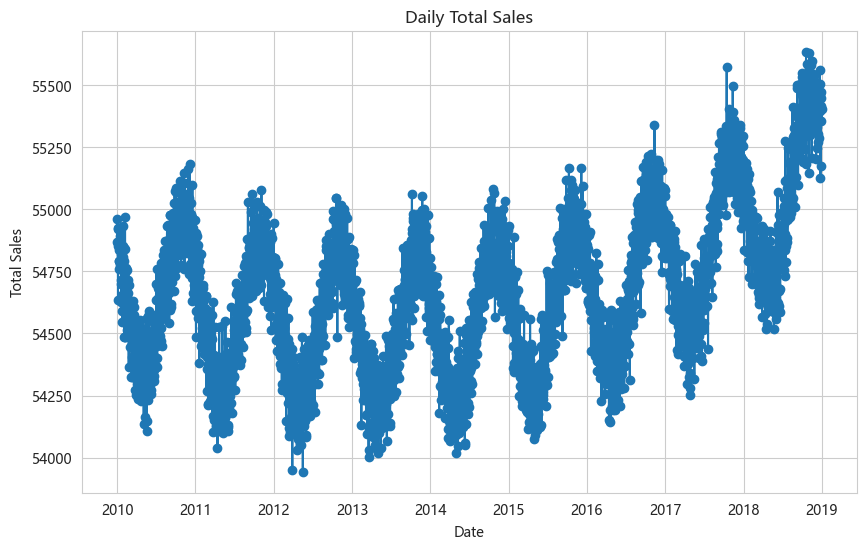

In [4]:
### 问题1：绘制按日销售总数量的时序图

import pandas as pd
import matplotlib.pyplot as plt

# 1. 将日期列转换为日期时间格式
df['Date'] = pd.to_datetime(df['Date'])

# 2. 按日期对销售数量进行聚合
daily_sales = df.groupby('Date')['number_sold'].sum().reset_index()

# 3. 绘制时序图
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['number_sold'], marker='o', linestyle='-')
plt.title('Daily Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


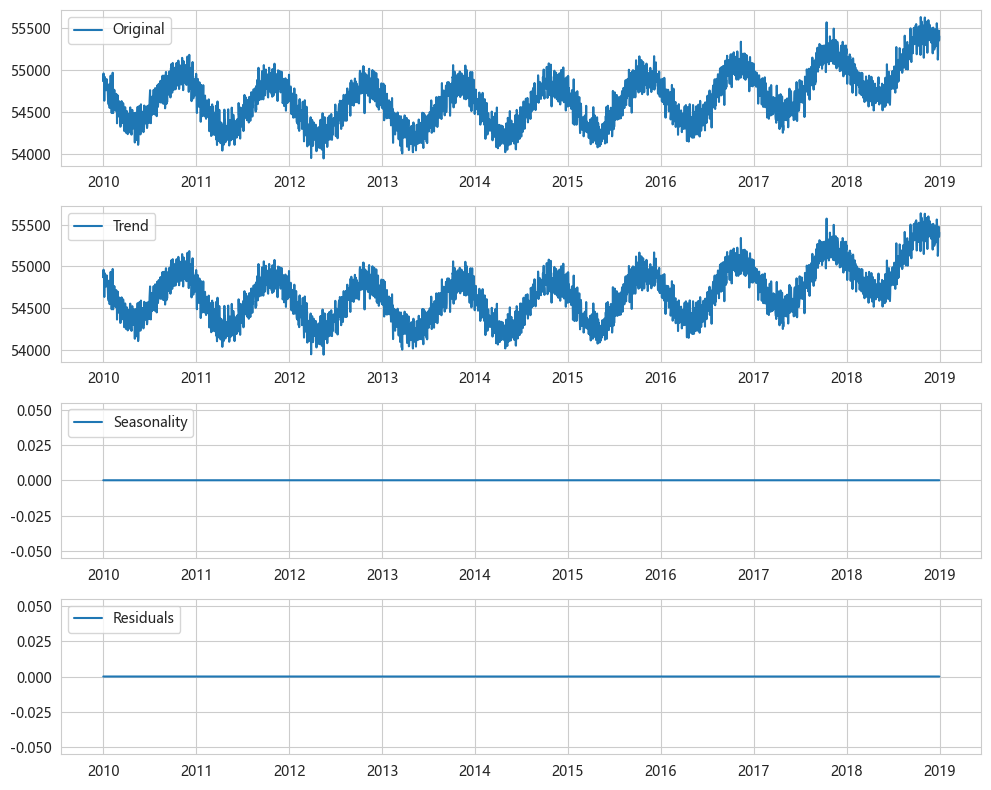

In [5]:
# ### 问题2：采用statsmodels对上述时序图进行趋势分解
# 
# - 使用sm.tsa.seasonal_decompose含函数

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. 将日期列转换为日期时间格式
df['Date'] = pd.to_datetime(df['Date'])

# 2. 按日期对销售数量进行聚合
daily_sales = df.groupby('Date')['number_sold'].sum().reset_index()

# 3. 对时序数据进行趋势分解
result = seasonal_decompose(daily_sales['number_sold'], model='additive', period=1)  # 设置period为1，表示不考虑季节性
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# 4. 绘制分解后的趋势图
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(daily_sales['Date'], daily_sales['number_sold'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(daily_sales['Date'], trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(daily_sales['Date'], seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(daily_sales['Date'], residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Importing plotly failed. Interactive plots will not work.
17:13:04 - cmdstanpy - INFO - Chain [1] start processing
17:13:05 - cmdstanpy - INFO - Chain [1] done processing
D:\Programing\Control\Anaconda\envs\mining\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Programing\Control\Anaconda\envs\mining\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


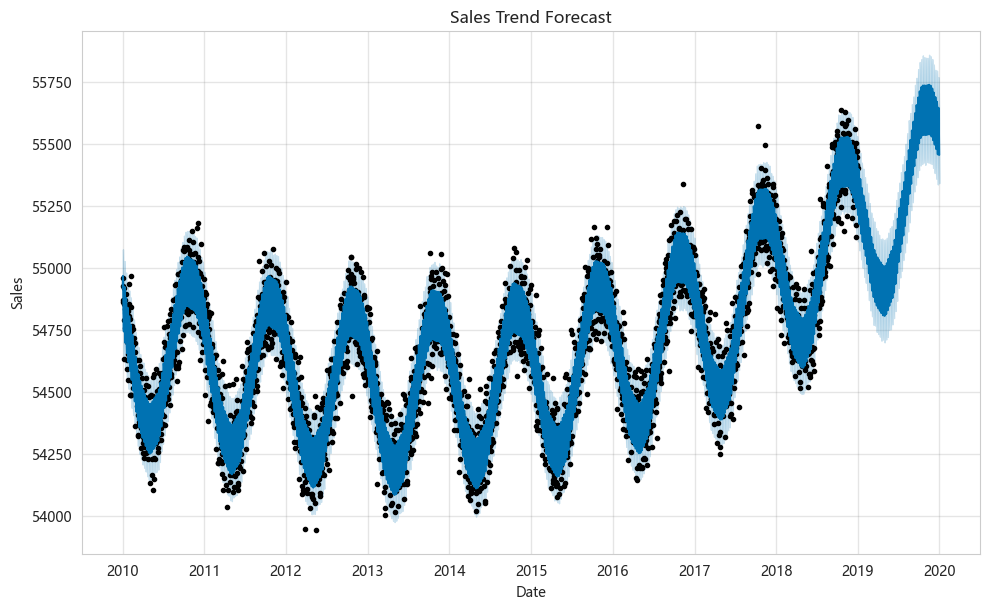

In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. 将日期列转换为日期时间格式
df['Date'] = pd.to_datetime(df['Date'])

# 2. 按日期对销售数量进行聚合
daily_sales = df.groupby('Date')['number_sold'].sum().reset_index()
daily_sales.columns = ['ds', 'y']  # Prophet要求列名为 'ds' 和 'y'

# 3. 创建并拟合Prophet模型
model = Prophet()
model.fit(daily_sales)

# 4. 生成未来日期并预测销售数量
future = model.make_future_dataframe(periods=365)  # 预测未来365天
forecast = model.predict(future)

# 5. 可视化结果
fig = model.plot(forecast)
plt.title('Sales Trend Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [7]:
import pandas as pd

# 将日期列设置为日期索引
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 按年重采样并计算均值
yearly_avg_sales = df.resample('Y').mean()

# 按月重采样并计算均值
monthly_avg_sales = df.resample('M').mean()

print("按年重采样计算均值：")
print(yearly_avg_sales)
print("\n按月重采样计算均值：")
print(monthly_avg_sales)


按年重采样计算均值：
            store  product  number_sold
Date                                   
2010-12-31    3.0      4.5   780.876438
2011-12-31    3.0      4.5   779.658513
2012-12-31    3.0      4.5   778.959290
2013-12-31    3.0      4.5   778.669628
2014-12-31    3.0      4.5   778.946967
2015-12-31    3.0      4.5   779.891037
2016-12-31    3.0      4.5   781.336222
2017-12-31    3.0      4.5   783.543523
2018-12-31    3.0      4.5   786.457613

按月重采样计算均值：
            store  product  number_sold
Date                                   
2010-01-31    3.0      4.5   782.674194
2010-02-28    3.0      4.5   780.484694
2010-03-31    3.0      4.5   778.058986
2010-04-30    3.0      4.5   776.665714
2010-05-31    3.0      4.5   776.608295
...           ...      ...          ...
2018-08-31    3.0      4.5   787.972811
2018-09-30    3.0      4.5   790.802381
2018-10-31    3.0      4.5   791.428571
2018-11-30    3.0      4.5   792.304762
2018-12-31    3.0      4.5   791.184332

[108 rows x 3 co

C:\Users\27116\AppData\Local\Temp\ipykernel_27680\4227246164.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_sales = df.resample('Y').mean()
C:\Users\27116\AppData\Local\Temp\ipykernel_27680\4227246164.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_sales = df.resample('M').mean()


In [8]:
from statsmodels.tsa.stattools import adfuller

# 使用按月重采样的数据进行 ADF 检验
result = adfuller(monthly_avg_sales['number_sold'])

# 提取检验结果
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:", critical_values)


ADF Statistic: 1.3364583375973103
p-value: 0.996805467300929
Critical Values: {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}


In [9]:
### 问题6： 采用KPSS检验，对按年重采用的数据进行平稳性检测

from statsmodels.tsa.stattools import kpss

# 使用按年重采样的数据进行 KPSS 检验
result = kpss(yearly_avg_sales['number_sold'])

# 提取检验结果
kpss_statistic = result[0]
p_value = result[1]
critical_values = result[3]

print("KPSS Statistic:", kpss_statistic)
print("p-value:", p_value)
print("Critical Values:", critical_values)


KPSS Statistic: 0.3667585926016007
p-value: 0.09148336525793073
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

# 模拟学生五个课程在初一到高三之间的成绩变化
grades = np.random.randint(60, 100, size=(5, 6))  # 初一到高三，每年的成绩

# 创建雷达图的极坐标系
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# 定义每个课程的标签
labels = ['数学', '英语', '物理', '化学', '语文']

# 初始化雷达图的线条
lines, = ax.plot([], [], 'o-', lw=2)

# 设置雷达图的标签
ax.set_xticks(np.linspace(0, 2*np.pi, 5, endpoint=False))
ax.set_xticklabels(labels)

# 设置雷达图的刻度范围
ax.set_ylim(0, 100)

# 初始化函数，用于更新雷达图的数据
def init():
    lines.set_data([], [])
    return lines,

# 更新函数，用于更新雷达图的数据
def update(frame):
    global grades  # 声明 grades 变量为全局变量
    data = grades[:, :frame+1]
    angles = np.linspace(0, 2*np.pi, 5, endpoint=False)
    data = np.concatenate((data, data[:, 0:1]), axis=1)  # 闭合成环状
    lines.set_data(angles, data)
    return lines,

# 创建动画
ani = FuncAnimation(fig, update, frames=range(6), init_func=init, interval=1000, blit=True)

# 显示动画
plt.show()


<IPython.core.display.Javascript object>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 生成 x 和 y 的网格
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

# 计算 z 值
z = x**2 - y**2

# 绘制三维曲面
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')

# 找出鞍点的位置
saddle_points = np.argwhere(np.abs(z) < 0.1)

# 在鞍点位置添加文本标识
for point in saddle_points:
    ax.text(x[point[0], point[1]], y[point[0], point[1]], z[point[0], point[1]], 
            f'Saddle Point ({x[point[0], point[1]]:.2f}, {y[point[0], point[1]]:.2f}, {z[point[0], point[1]]:.2f})',
            color='red')

# 设置坐标轴和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

# 显示图形
plt.show()


<IPython.core.display.Javascript object>